<a href="https://colab.research.google.com/github/relebohilebiza/MVCTutorial/blob/master/My_Real_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)




TensorFlow 2.x selected.


In [0]:
base_dir = os.path.join(os.path.dirname('/content/Tradition/'), '')
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

train_cats_dir = os.path.join(train_dir, 'sesotho')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'zulu')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'sesotho')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'zulu')  # directory with our validation dog pictures

In [17]:
zip_dir_base = os.path.dirname('Tradition/')
!find $zip_dir_base -type d -print

Tradition
Tradition/validation
Tradition/validation/sesotho
Tradition/validation/zulu
Tradition/validation/.ipynb_checkpoints
Tradition/train
Tradition/train/sesotho
Tradition/train/zulu
Tradition/train/.ipynb_checkpoints
Tradition/.ipynb_checkpoints


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [19]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 241
total training dog images: 228
total validation cat images: 53
total validation dog images: 56
--
Total training images: 469
Total validation images: 109


In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [44]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 469 images belonging to 3 classes.


In [23]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 109 images belonging to 3 classes.


In [0]:
sample_training_images, _ = next(train_data_gen) 

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [49]:
EPOCHS = 10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/10
5/5 [==============================] - 33s 7s/step - loss: 0.7198 - accuracy: 0.5309 - val_loss: 0.6910 - val_accuracy: 0.6330
Epoch 2/10
5/5 [==============================] - 31s 6s/step - loss: 0.6992 - accuracy: 0.5267 - val_loss: 0.6864 - val_accuracy: 0.6697
Epoch 3/10
5/5 [==============================] - 31s 6s/step - loss: 0.6840 - accuracy: 0.5288 - val_loss: 0.5737 - val_accuracy: 0.5688
Epoch 4/10
5/5 [==============================] - 30s 6s/step - loss: 0.6607 - accuracy: 0.6269 - val_loss: 0.6056 - val_accuracy: 0.7615
Epoch 5/10
5/5 [==============================] - 31s 6s/step - loss: 0.6126 - accuracy: 0.6908 - val_loss: 0.4820 - val_accuracy: 0.7523
Epoch 6/10
5/5 [==============================] - 30s 6s/step - loss: 0.5918 - accuracy: 0.6887 - val_loss: 0.4970 - val_accuracy: 0.6239
Epoch 7/10
5/5 [==============================] - 30s 6s/step - loss: 0.6097 - accuracy: 0.6439 - val_loss: 0.7021 - val_accuracy: 0.7248
Epoch 8/10
5/5 [==================

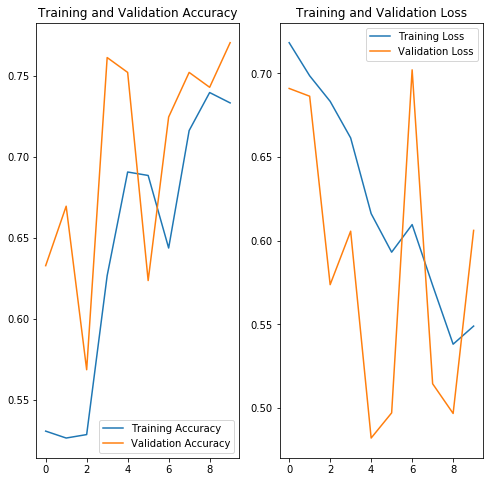

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()